In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [67]:
df = pd.read_csv('Telco.csv')


In [68]:
df.shape

(7043, 21)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
#Displaying the columns in dataset
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical Columns:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [83]:

# Преобразование столбца в числовой формат
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)  # Заменяем нули средними значениями

C:\Users\jija0\AppData\Local\Temp\ipykernel_11732\1100549428.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)  # Заменяем нули средними значениями


In [84]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
# Удаляю признак 'customerID', не несёт значимости для модели
df = df.drop('customerID', axis=1)

KeyError: "['customerID'] not found in axis"

In [86]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

В данных нет нулей, хороший знак

customerID : Customer ID
gender : Whether the customer is a male or a female
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
Partner: Whether the customer has a partner or not (Yes, No)
Dependents: Whether the customer has dependents or not (Yes, No)
tenure : Number of months the customer has stayed with the company
PhoneService: Whether the customer has a phone service or not (Yes, No)
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service
Contract : The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges : The amount charged to the customer monthly
TotalCharges : The total amount charged to the customer
Churn : Whether the customer churned or not (Yes or No)

#Determine the Target Variable



In [75]:
# Распределение целевой переменной
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

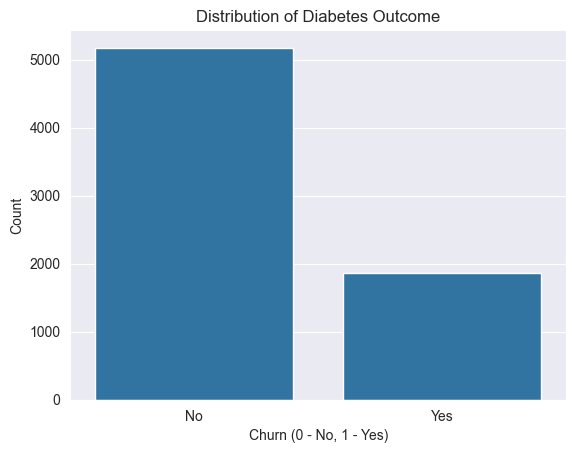

In [76]:
sns.countplot(x="Churn", data=df)
plt.xlabel("Churn (0 - No, 1 - Yes)")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")
plt.show()

Данная гистограмма показывает ушёл ли клиент или нет. Видим, что распределение неравномерное, большинство людей осталось(5174), остальные (1869)- ушли

<Figure size 600x400 with 0 Axes>

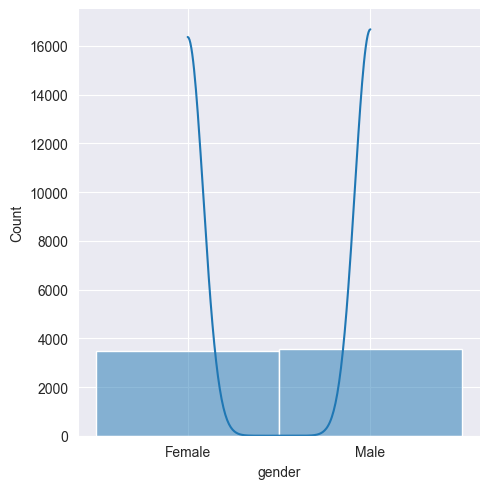

<Figure size 600x400 with 0 Axes>

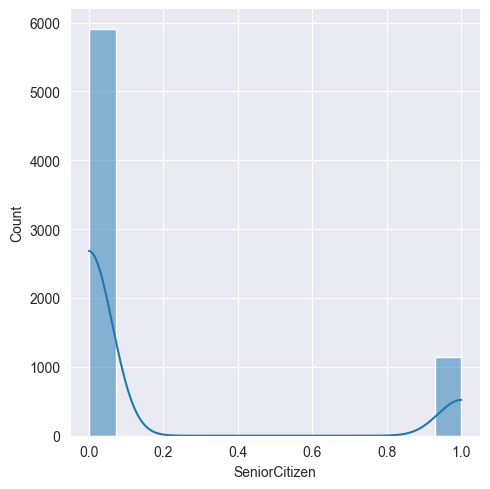

<Figure size 600x400 with 0 Axes>

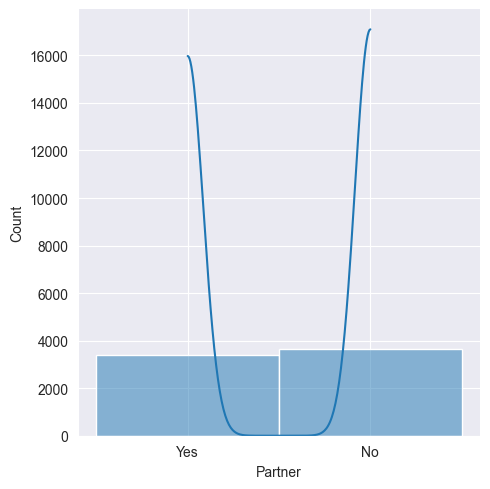

<Figure size 600x400 with 0 Axes>

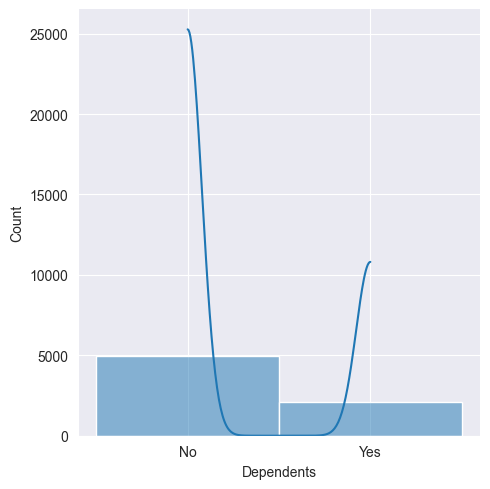

<Figure size 600x400 with 0 Axes>

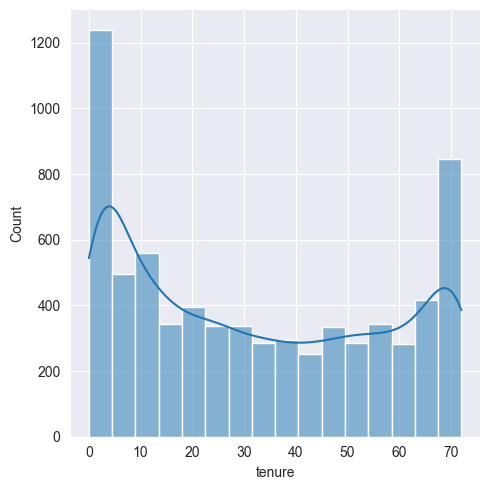

<Figure size 600x400 with 0 Axes>

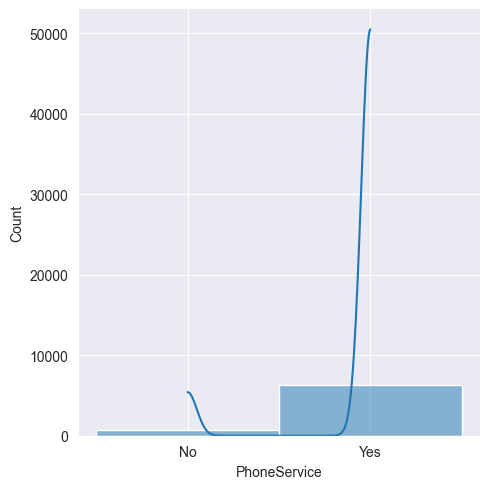

<Figure size 600x400 with 0 Axes>

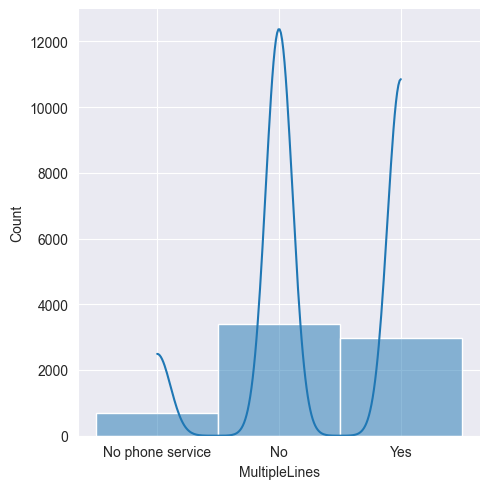

<Figure size 600x400 with 0 Axes>

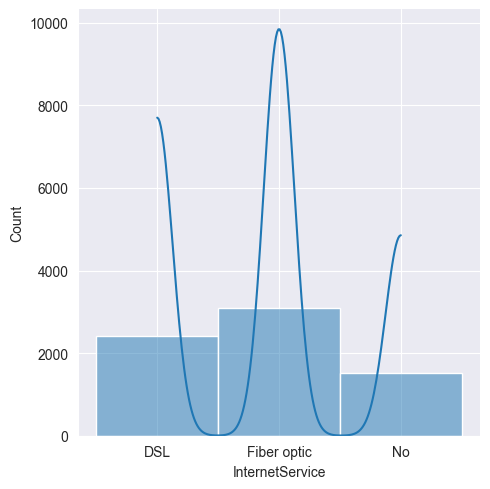

<Figure size 600x400 with 0 Axes>

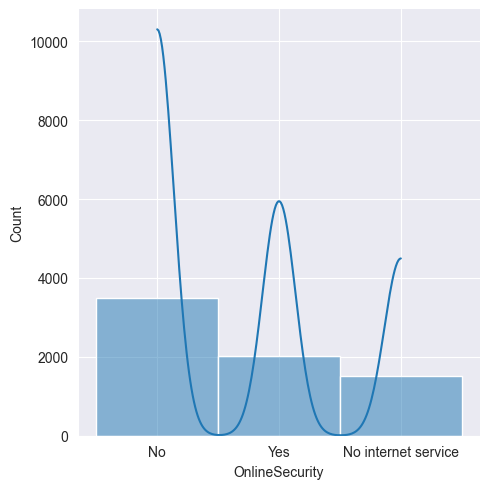

<Figure size 600x400 with 0 Axes>

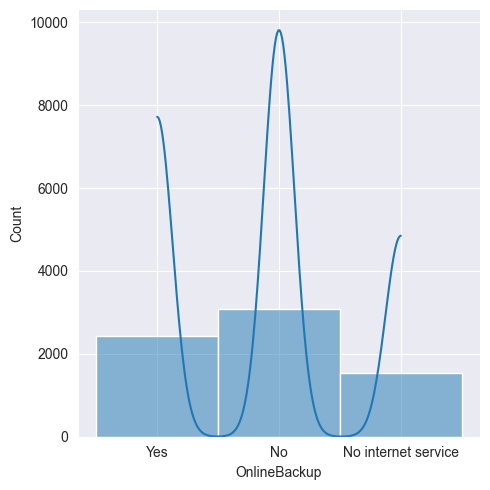

<Figure size 600x400 with 0 Axes>

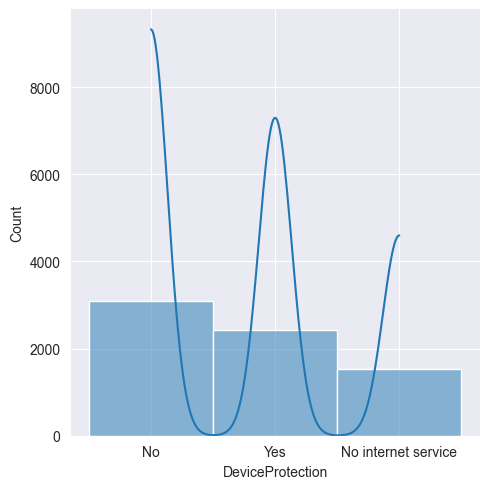

<Figure size 600x400 with 0 Axes>

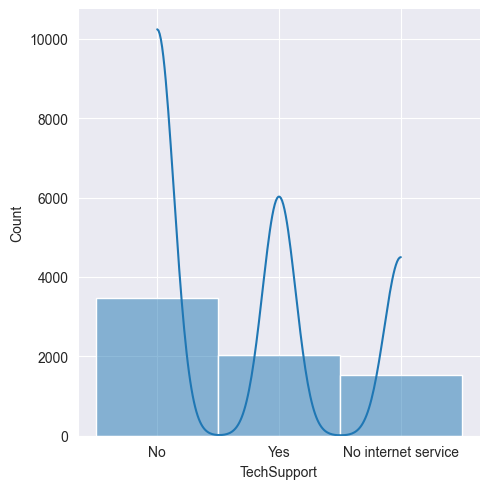

<Figure size 600x400 with 0 Axes>

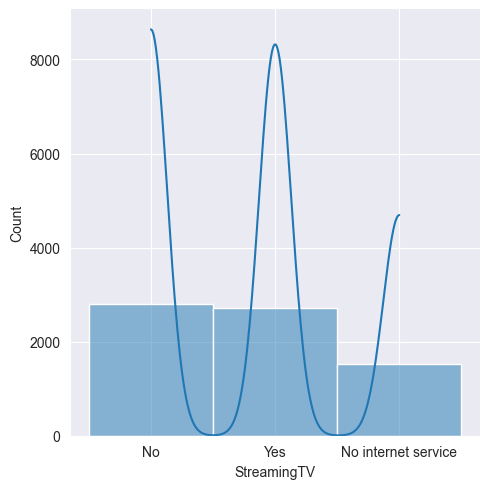

<Figure size 600x400 with 0 Axes>

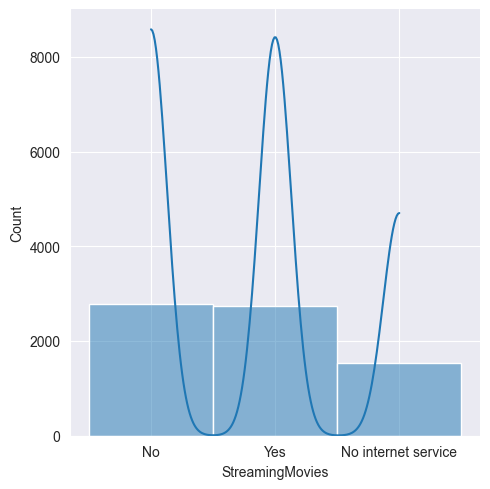

<Figure size 600x400 with 0 Axes>

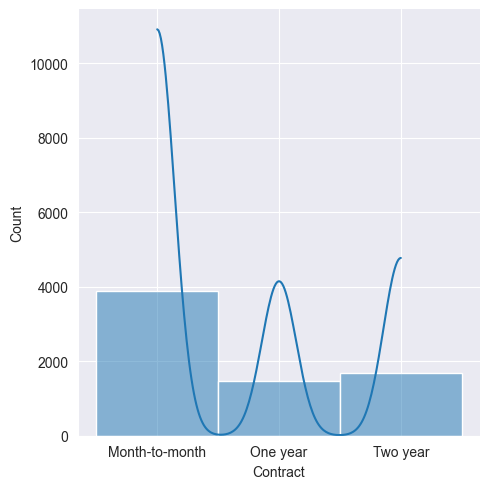

<Figure size 600x400 with 0 Axes>

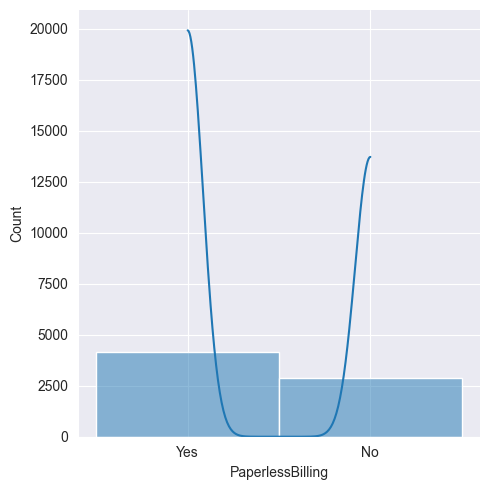

<Figure size 600x400 with 0 Axes>

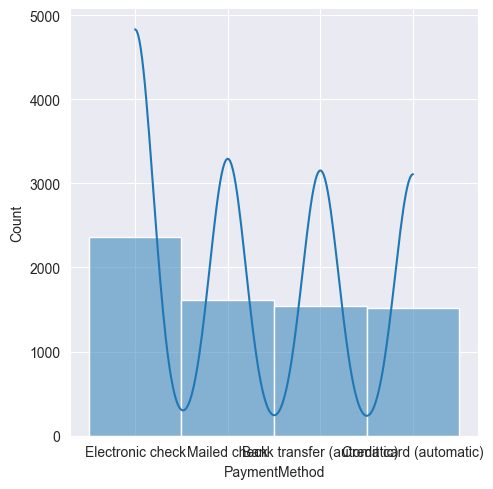

<Figure size 600x400 with 0 Axes>

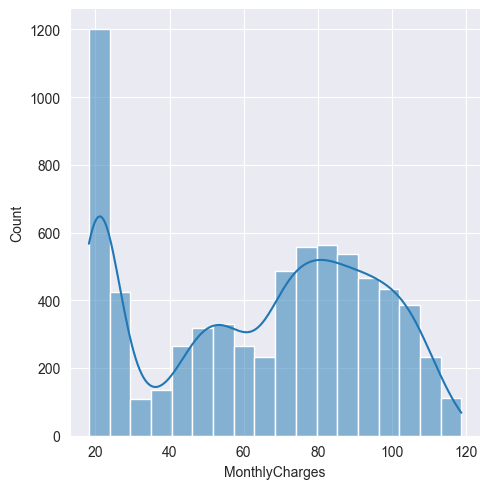

<Figure size 600x400 with 0 Axes>

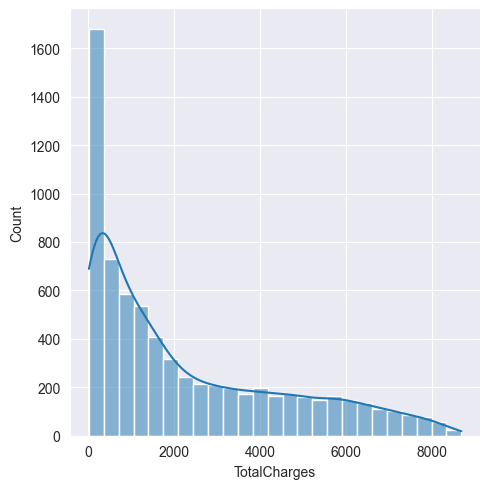

<Figure size 600x400 with 0 Axes>

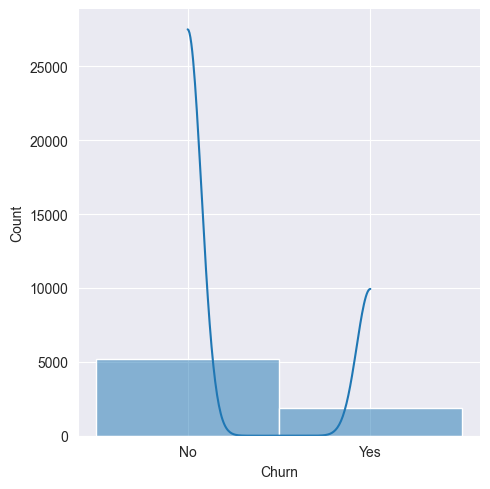

In [77]:
# Loop through each column in the DataFrame and plot the distribution of each column using seaborn displot
for col in df.columns:
    # Create a new figure with the specified size
    plt.figure(figsize=(6, 4))
    # Use seaborn displot to plot the distribution of the column with kde (Kernel Density Estimation) enabled
    sns.displot(data=df[col], kde=True)
    # Display the plot
    plt.show()



    Гендерный признак распределен равномерно(примерно 3800)
    Пенсионеров-клиентов в датасете мало
    Признак "Partner" распределён равномерно
    У 5000 клиентов нет иждевенцов
    Наибольшее количество работы клиентов по месяцам - 5 месяцев
    Чаще всего клиенты предпочитают оплачивать контракт каждый месяц, а не заключать годовые или 2х-годовые контракты


In [109]:
from sklearn.preprocessing import LabelEncoder


encode_columns = ['gender', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'Churn']

le = LabelEncoder()

for column in encode_columns:
    df[column] = le.fit_transform(df[column])




In [110]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Data Preparation

In [111]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
Y = df['Churn']
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [112]:
from sklearn.metrics import accuracy_score

# Dictionary of models with their respective hyperparameters
models = {
    'Наивный байесовский классификатор': GaussianNB(),
    'Наивный Мультиномиальный  байесовский классификатор': MultinomialNB(),
    'Бернуллиев наивный байесовский классификатор': BernoulliNB()
}



In [113]:
# Loop through each model and fit it to the training data
accuracy_test = []
for name, model in models.items():
    m = model.fit(x_train, y_train)
    y_pred_test = m.predict(x_test)
    atest = accuracy_score(y_test, y_pred_test)
    accuracy_test.append(atest)
print(accuracy_test)

[0.7543776620918126, 0.6691907240889731, 0.747278750591576]


In [114]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame()
results_df['Model'] = models.keys()
results_df['Accuracy'] = accuracy_test



In [115]:
results_df

,Model,Accuracy
0,Наивный байесовский классификатор,0.754378
1,Наивный Мультиномиальный байесовский классифи...,0.669191
2,Бернуллиев наивный байесовский классификатор,0.747279
